# Prova IA : Questão 3 


## Thales Monteiro Soares  

### <div style="text-align: justify"> Facebook Live Sellers in Thailand Data Set é uma base que contém informações de páginas do facebook de 10 vendedores de moda e cosméticos tailandeses. Publicações do tipo vídeo, fotos, status e links. </div>

#### Base utilizada: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## Drop das 4 últimas colunas com atributo NAN

In [3]:
df = df.drop(df.iloc[:,12:], axis = 1)

## Drop do status_id

In [4]:
df = df.drop('status_id', axis = 1)

## Verificando valores duplicados
### Foram encontradas 54 instâncias duplicadas no dataset

In [7]:
print('Valores duplicados:', df.duplicated().value_counts())

Valores duplicados: False    6996
dtype: int64


In [8]:
df = df.drop_duplicates()

## Verificando valores Nulos

In [9]:
print('Valores faltantes:', df.isnull().sum())

Valores faltantes: status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


## Boxplot da base

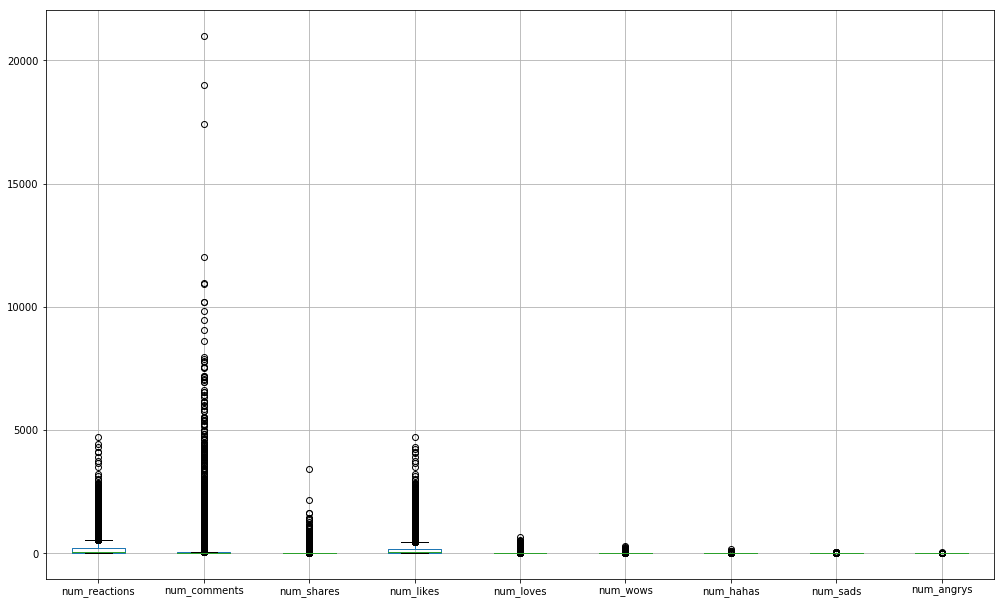

In [10]:
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
df.boxplot()

## Verificando Outliers na coluna num_comments
### <div style="text-align: justify"> Foi considerado outlier valores de comentário acima de 10 mil, visto que as mesmas instâncias possuiam valores de reações abaixo de 1 mil. </div>

In [11]:
df['num_comments'].nlargest(10)

498     20990
480     19013
6757    17404
3246    12003
6762    10960
6799    10926
6659    10194
6448    10186
6775     9831
3892     9452
Name: num_comments, dtype: int64

In [12]:
df.drop([498, 480, 6703, 3246, 6762, 6799, 6659, 6448], axis = 0 ,inplace = True)

## Verificando inconsistência dos dados
### Soma das reações diferente do num_reactions

In [13]:
ver = df['num_reactions'] != (df['num_likes'] + df['num_loves'] + df['num_wows'] + df['num_hahas'] + df['num_sads'] + df['num_angrys'])
#Quantidade de instâncias com dados inconsistentes
len(df[ver])

9

In [14]:
df.drop(df[ver].index, axis = 0, inplace = True)

## Eliminando coluna 'num_reactions'
### Coluna apresenta a mesma informação das demais colunas de reações.

In [18]:
df.drop('num_reactions', axis = 1, inplace = True)

In [19]:
df = df.reset_index()
df.drop("index", axis = 1, inplace = True)

### Excluindo coluna status_published pois a informação de horário não é relevante.

In [23]:
df.drop("status_published", axis = 1, inplace = True)

In [24]:
x = df
saida = df['status_type']

## Realizando Label Encoder na coluna status_type

In [25]:
from sklearn.preprocessing import LabelEncoder

status_type = LabelEncoder().fit_transform(df['status_type'])
df['status_type'] = status_type

# <center> Algoritmos de Clustering </center>

## Hierárquico single linkage

### O single linkage utiliza a menor das distâncias existentes entre dois clusters no processo de concatenação de clusters. 

### Exemplificação do método:
### n_cluster = 3

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)

In [28]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6977
1,1
2,1


### n_cluster = 10

In [29]:
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)

In [30]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6969
1,2
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


## Hierárquico complete linkage

### <div style="text-align: justify"> No complete linkage o algoritmo utiliza a maior das distâncias existentes durante o processo de concatenação de clusters. </div>

### Exemplificação do método:
### n_cluster = 3

In [31]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)

In [32]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6946
1,32
2,1


### n_cluster = 5

In [33]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)

In [34]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6685
1,230
2,32
3,31
4,1


## K-Means
#### Os centroides são definidos de forma randômica. 

### Exemplificação do Algoritmo:
### K = 2

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state= 15).fit(x)
a = pd.DataFrame(kmeans.labels_)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])


,Nº Instancias
0,6819
1,160


### K = 5

In [36]:
kmeans = KMeans(n_clusters=5, random_state=15).fit(x)
a = pd.DataFrame(kmeans.labels_)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6025
1,437
2,374
3,110
4,33


## Normalizando a base
### Realizando normalização da base para verificar o desempenho dos algoritmos com a base normalizada e não normalizada.

In [37]:
# Foi utilizada a seguinte função para normalizar os dados
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [38]:
saida = df['status_type']
df = normalize(df)
x = df

## <center> Algoritmos aplicados com base normalizada </center>

## Hierárquico Single Linkage

In [39]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6977
1,1
2,1


In [41]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6975
1,1
2,1
3,1
4,1


## Hierárquico Complete Linkage

In [42]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,4298
1,2668
2,13


In [43]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,4291
1,2668
2,12
3,7
4,1


## K-Means

In [44]:
kmeans = KMeans(n_clusters=2, random_state=15).fit(x)
a = pd.DataFrame(kmeans.labels_)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,4296
1,2683


In [45]:
kmeans = KMeans(n_clusters=5, random_state=15).fit(x)
a = pd.DataFrame(kmeans.labels_)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,4094
1,2141
2,334
3,229
4,181


# <center> Comparando Resultados </center>
### <div style="text-align: justify">  A seguir podemos acompanhar o resultado dos testes em cada método de agrupamento onde variamos o K e executamos o método tanto na base normalizada quanto na base não normalizada. </div>


## <center> Hierárquico Single Linkage </center>

K = 3|Número de Clusters | Quant. Instância Não normalizado |  Quant. Instância normalizado
:--------- |:---------: | :------: | -------:
|0	|6977|		6977
|1	|1|		1
|2	|1|		1


K = 5|Número de Clusters | Quant. Instância Não normalizado |  Quant. Instância normalizado
:--------- |:---------: | :------: | -------:
|0	|6975|		6975
|1	|1|		1
|2	|1|		1
|3	|1|		1
|4	|1|		1

K = 10|Número de Clusters | Quant. Instância Não normalizado |  Quant. Instância normalizado
:--------- |:---------: | :------: | -------:
|0	|6969|		6969
|1	|2|		2
|2	|1|		1
|3	|1|		1
|4	|1|		1
|5	|1|		1
|6	|1|		1
|7	|1|		1
|8	|1|		1
|9	|1|  	1

## <center> Hierárquico Completed Linkage </center>

K = 3|Número de Clusters | Quant. Instância Não normalizado |  Quant. Instância normalizado
:--------- |:---------: | :------: | -------:
|0	|6946|		4298
|1	|32|		2668
|2	|1|		13



K = 4|Número de Clusters | Quant. Instância Não normalizado |  Quant. Instância normalizado
:--------- |:---------: | :------: | -------:
|0	|6716|		4298
|1	|230|		2668
|2	|32|		12
|3	|1|		1


K = 5|Número de Clusters | Quant. Instância Não normalizado |  Quant. Instância normalizado 
:--------- |:---------: | :------: | -------:
|0	|6685|		4291
|1	|230|		2668
|2	|32|		12
|3	|31|		7
|4	|1|		1

K = 6|Número de Clusters | Quant. Instância Não normalizado |  Quant. Instância normalizado
:--------- |:---------: | :------: | -------:
|0	|6685|		4279
|1	|153|		2668
|2	|77|		12
|3	|32|		12
|4	|31|		7
|5	|1|		1


## <center> K-Means </center>

                                                  
K = 2|Número de Clusters | Quant. Instância Não normalizado |  Quant. Instância normalizado
:--------- |:---------: | :------: | -------:
|0	|6819|		4296
|1	|160|		2683


K = 3|Número de Clusters | Quant. Instância Não normalizado |  Quant. Instância normalizado
:--------- |:---------: | :------: | -------:
|0	|6361|		4128
|1	|465|		2320
|2	|153|		531

K = 4|Número de Clusters | Quant. Instância Não normalizado |  Quant. Instância normalizado
:--------- |:---------: | :------: | -------:
|0	|6064|		4099
|1	|435|		2320
|2	|376|		333
|3	|104|		227


K = 5|Número de Clusters | Quant. Instância Não normalizado |  Quant. Instância normalizado
:--------- |:---------: | :------: | -------:
|0	|6025|		4094
|1	|437|		2141
|2	|374|		334
|3	|110|		229
|4	|33|		181


K = 6|Número de Clusters | Quant. Instância Não normalizado |  Quant. Instância normalizado
:--------- |:---------: | :------: | -------:
|0	|5872|		4090
|1	|432|		2089
|2	|335|		331
|3	|197|		206
|4	|110|		170
|5	|33|		93


### <div style="text-align: justify"> Quando os dados não estão normalizados, tanto o hierárquico quanto o kmeans, apresentam clusters com maior número de instâncias em um único cluester.  Quando normalizados ambos os algoritmos geravam clusters mais distribuido. </div>

### <div style="text-align: justify"> O single linkage no hierárquico se mostrou pouco efetivo para esse conjunto de dados. </div>

# PCA (Principal component analysis)
### <div style="text-align: justify"> Aplicando o PCA  para realizar um redimensionamento dos dados com o objetivo de visualizar a disperção e os clusters formados. </div>

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dfpca = pca.fit_transform(x)

### Dispersão dos dados

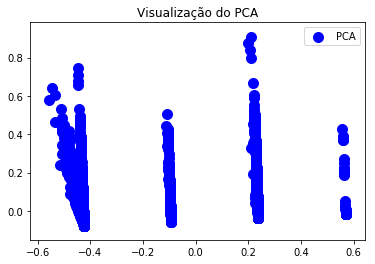

In [48]:
plt.scatter(dfpca[:,0], dfpca[:,1], s = 100, c = 'blue', label = 'PCA')
plt.title('Visualização do PCA')
plt.legend()

### <div style="text-align: justify"> No gráfico acima podemos ver que a presença de quatro grupos, que podemos inferir que foram agrupados com base nos 4  tipos de postagens(video, photos, status e links). </div>

### <div style="text-align: justify"> Realizaremos a construção dos clusters no dataframe considerando que queremos agrupar as postagens entre video, photo, status e links. </div>

## Hieárquico complete linkage

In [51]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(dfpca)

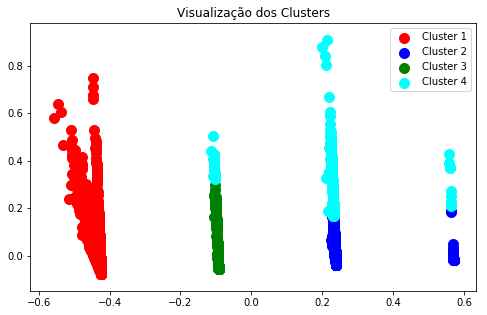

In [74]:
# Visualizando os clusters
x_size = 8
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
           
plt.scatter(dfpca[y_hc == 0,0], dfpca[y_hc == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dfpca[y_hc == 1,0], dfpca[y_hc == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(dfpca[y_hc == 2,0], dfpca[y_hc == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(dfpca[y_hc == 3,0], dfpca[y_hc == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Visualização dos Clusters')

plt.legend()

### Verificando agrupamento

In [75]:
# Verificando quantas amostras foram nomeadas corretamente.

correct_labels = sum(saida == y_hc)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, saida.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(saida.size)))

Result: 4372 out of 6979 samples were correctly labeled.
Accuracy score: 0.63


#  K- Means

In [76]:
kmeans = KMeans(n_clusters= 4, random_state=0).fit(dfpca)
y_hc = kmeans.labels_

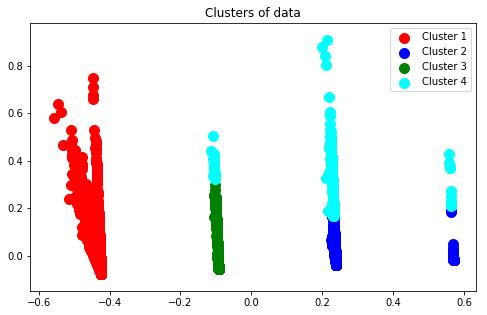

In [77]:
# Visualizando os clusters
x_size = 8
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
                    
plt.scatter(dfpca[y_hc == 0,0], dfpca[y_hc == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dfpca[y_hc == 1,0], dfpca[y_hc == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(dfpca[y_hc == 2,0], dfpca[y_hc == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(dfpca[y_hc == 3,0], dfpca[y_hc == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of data')
plt.legend()

In [78]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(saida == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, saida.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(saida.size)))

Result: 4372 out of 6979 samples were correctly labeled.
Accuracy score: 0.63


## Método Elbow

### <div style="text-align: justify"> O método Elbow é utilizado para estimar o número ideal de clusters k. Podemos dizer que quando o k aumentar a distorção irá diminuir, isso se dá pois as amostras estarão mais próximas dos centróides aos quais estão atribuidas. </div>
### <div style="text-align: justify"> O método procura identificar o valor de K onde a distorção diminui mais rapidamente. </div>

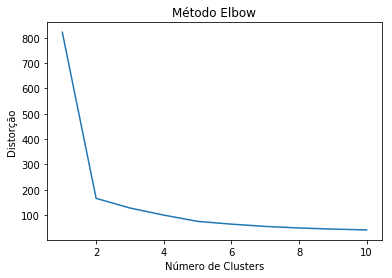

In [79]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorção')
plt.show()

### <div style="text-align: justify"> Podemos observar no gŕafico que em K = 4 a queda da distorção(inertia) apresenta pouca variação entre os K a seguir, ou seja, o melhor valor de K seria 4. </div>

# Conclusão

### <div style="text-align: justify"> Podemos concluir que o K-Means apresentou melhor resultado em comparação com o Hierárquico. </div>
### <div style="text-align: justify">  Utilizando o K-Means com K = 4 obtivemos uma clusterização com 63% de acerto.</div>
